# ABCD Method 

Use: Act as a probabilistic classifier for discriminating auxillary events from background events\
Example of auxillary event: events consisting of less than 4 b-quarks -> unlikely to be signal events but are kinematically related to background events

Imagine a grid where the 4 windows are labelled as A,B, C and D -> this method essentially helps us determine the expected background in the D region 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

To understand how this works, imagine two arrays of equal length, N1 and N2\
These arrays are made up of 0s and 1s (in a randomized fashion)\
The A region will refer to when 1s appear in both arrays, hence labelled N11\
The B region will refer to when a 0 appears in N1 but a 1 appears in N2, hence labelled N01\
The C region will be the filped version of N01, hence named N10\
Then the D region can be give as D = C * B/A

In [4]:
def ABCD(arr_len): 
    
    # generate random arrays of equal length containing 0's or 1's
    N1=np.random.randint(0,2,arr_len, dtype=int)
    N2=np.random.randint(0,2,arr_len, dtype=int)
    
    # start counts at 0
    N11=0
    N10=0
    N01=0
    
    # start iterating for length of array when a condition is true
    for i in np.arange(arr_len):
        
        # when found both times --> add to N11
        if N1[i]==1 and N2[i]==1:
            N11+=1
    
        # when found 1st time, missed 2nd time --> add to N10
        if N1[i]==1 and N2[i]==0:
            N10+=1
            
        # when found 2nd time, missed 1st time --> add to N01
        if N1[i]==0 and N2[i]==1:
            N01+=1
    
    # total missed both times is given by formula D=C*B/A
    N00=N10*np.divide(N01,N11)
    
    # fraction value (B/A) tells you of likelihood of missing
    frac=np.divide(N01,N11)
    
    #return values of interest
    return N00,frac

In [15]:
val=[]
predicted=[]

y_axis= np.arange(10,3000)

# Lets check for arrays of various lengths and save values so that it can be plotted
for i in y_axis:
    
    val.append(ABCD(i)[-1])
    predicted.append(ABCD(i)[0])

<IPython.core.display.Javascript object>


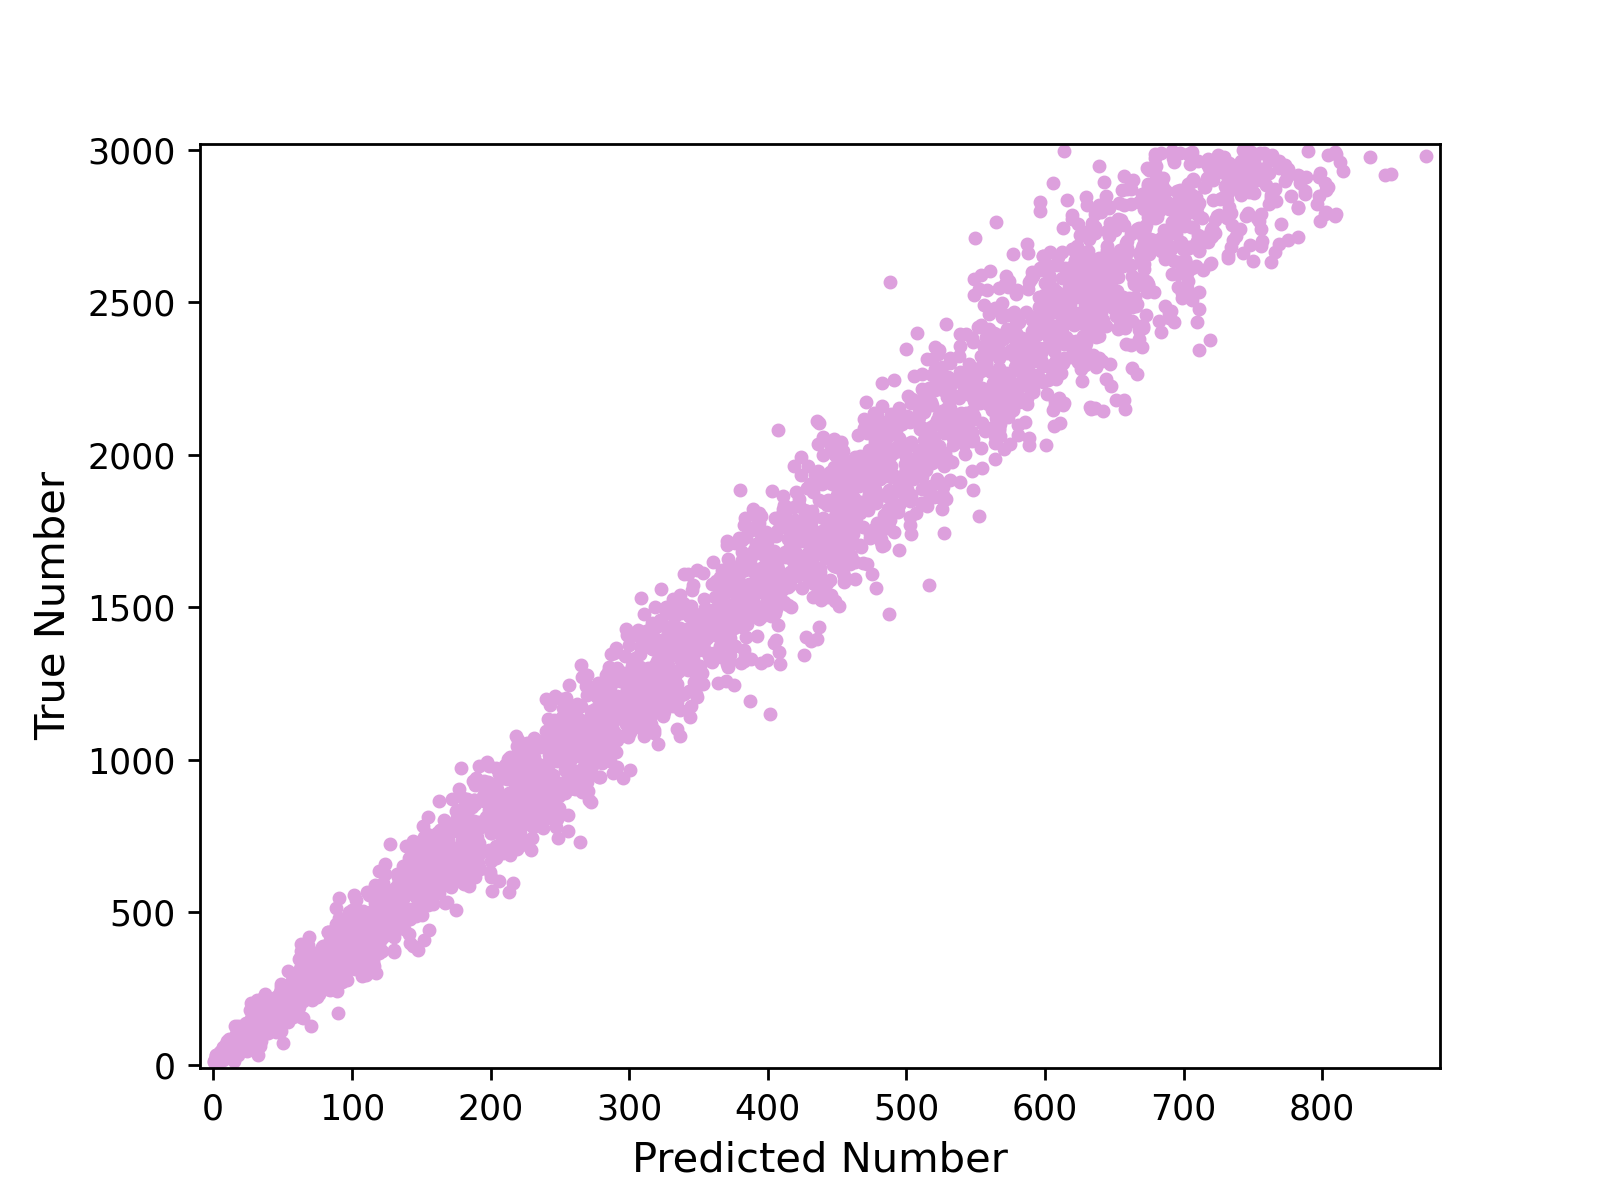

In [19]:
plt.figure()

plt.plot(predicted,y_axis,'.',color='plum')

plt.ylabel('True Number',fontsize='large') #which is also the given array length
plt.xlabel('Predicted Number',fontsize='large')

plt.ylim(np.min(y_axis)-20,np.max(y_axis)+20)
plt.xlim(np.min(predicted)-10,np.max(predicted)+10)
plt.show()

<IPython.core.display.Javascript object>


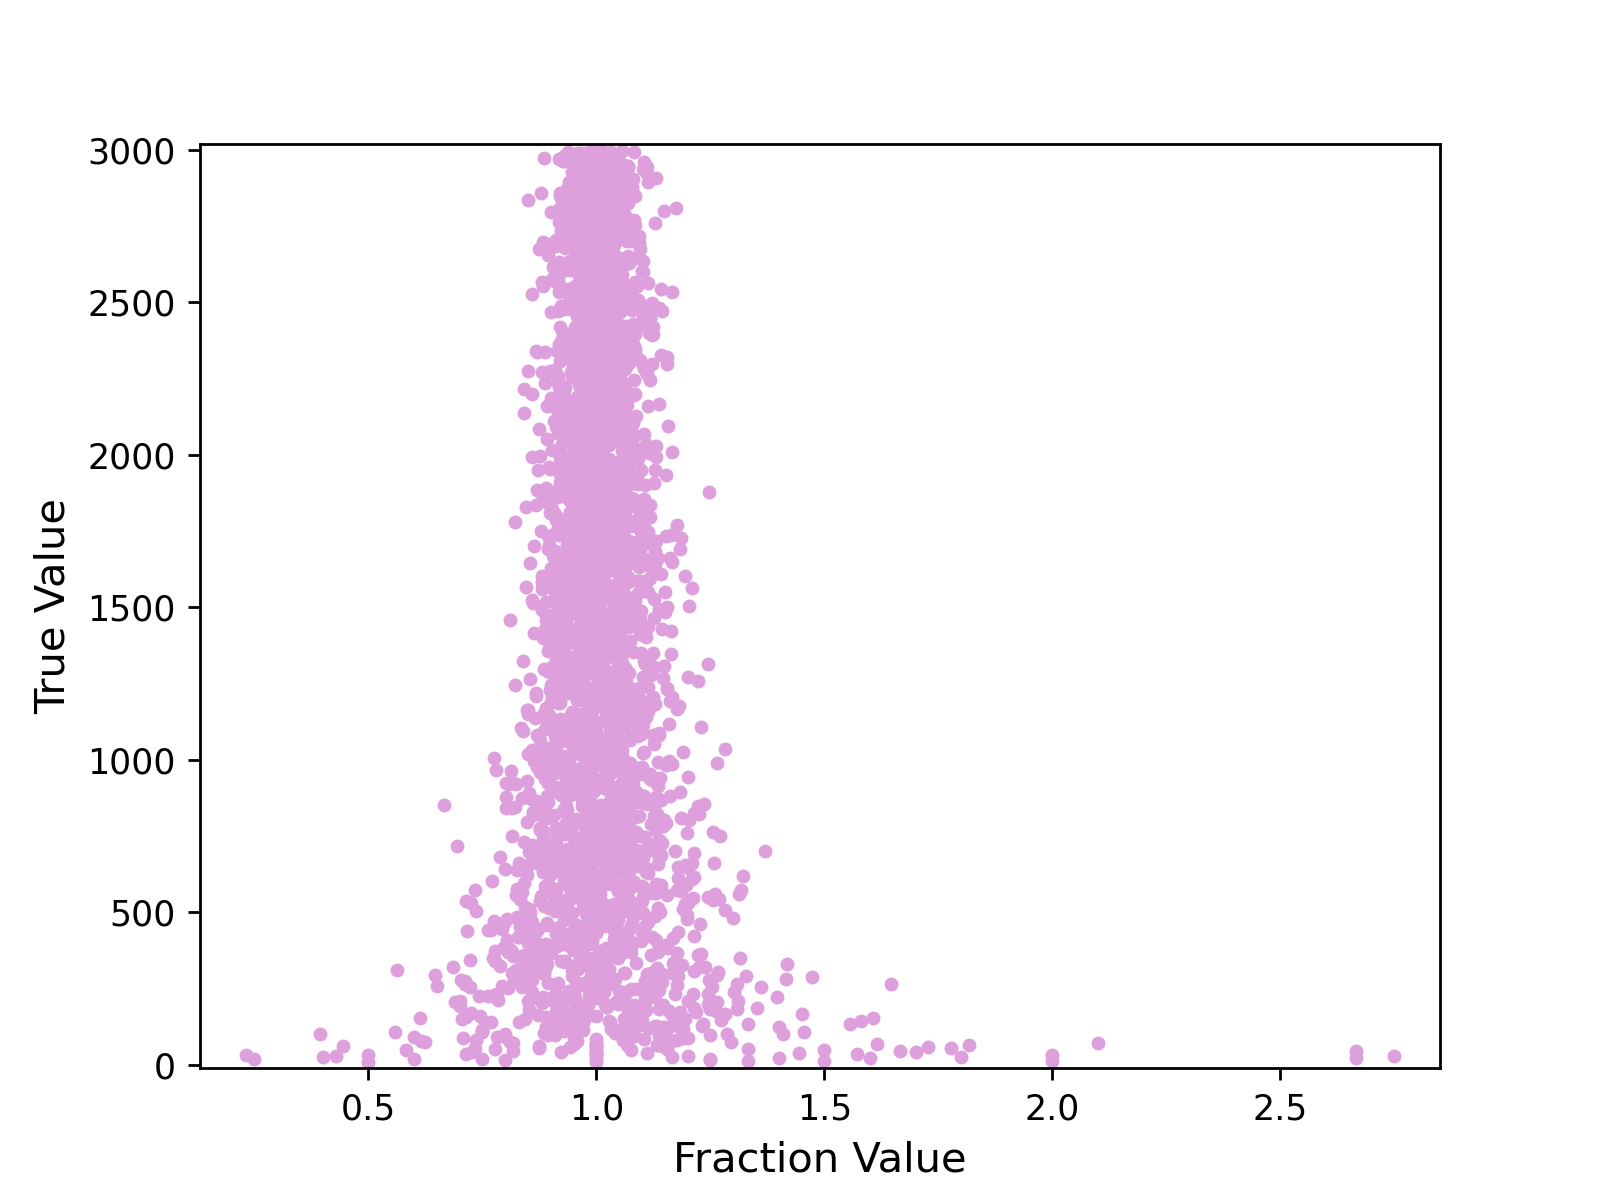

In [22]:
plt.figure()

plt.plot(val,y_axis,'.',color='plum')

plt.ylabel('True Value',fontsize='large')
plt.xlabel('Fraction Value',fontsize='large') #frac value (B/A) --> likelihood of missing

plt.ylim(np.min(y_axis)-20,np.max(y_axis)+20)
plt.xlim(np.min(val)-0.1,np.max(val)+0.1)
plt.show()